# Stochastic Optimization

## Import Statements

In [678]:
import numpy as np
import matplotlib.pyplot as plt
import itertools
import pixiedust

## Simulated Annealing

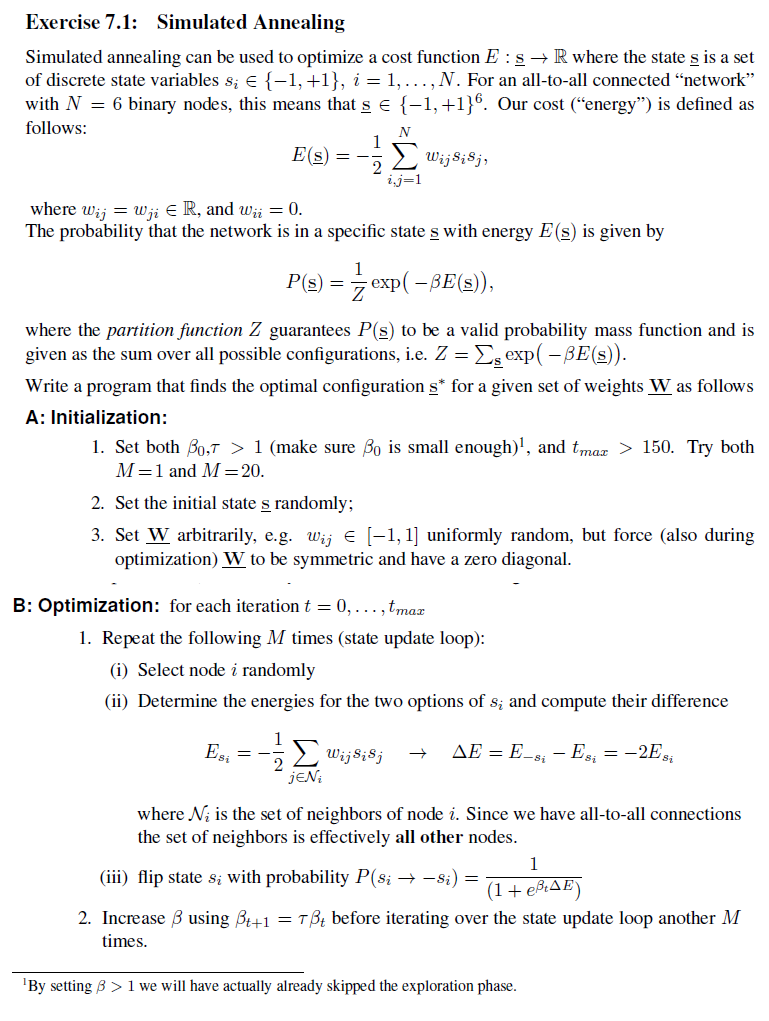

In [2020]:
states = itertools.product([1,-1],repeat=6)
states = np.array(list(states))

In [2021]:
labels = np.empty((64,6),dtype=object)

In [2022]:
for i,state in enumerate(states):
    for j,k in enumerate(state):
        if k == 1:
            labels[i,j] = '●'
        else:
            labels[i,j] = '○'
labels = [' '.join(list(i)) for i in labels]

In [2023]:
def random_weight(n, seed=5):
    random = np.random.RandomState(seed)
    w = random.rand(n, n) * 2 - 1
    w = np.triu(w, 1) + np.triu(w, 1).T
    return w

In [2025]:
#initialization
w = random_weight(6)
M=20
r_idx = np.random.choice(np.arange(6),1)[0]
s = states[r_idx, :]
beta = 1.05
tau = 1.01
inv_temp = []
total_energy=[]

for t in range(300):
    for m in range(M):
        i = np.random.randint(0,6,1)[0] 
        N = np.copy(s)
        N[i] = 0
        local_energy = -0.5 * np.dot( (w[i,:]*s[i]) , N )
        dE = -2*local_energy
        P = 1/(1+np.exp(beta*dE))
        s[i] = np.random.choice([s[i], s[i]*-1], 1 , p=[1-P, P])[0]
    total_energy.append(-0.5* np.sum(w * np.outer(s,s)))
    beta = beta * tau
    inv_temp.append(1/beta)     
s

array([ 1,  1, -1,  1, -1,  1])

In [1480]:
total_energy_m1 = total_energy

In [1486]:
total_energy_m20 = total_energy

Text(0, 0.5, 'Inverse Temperature ')

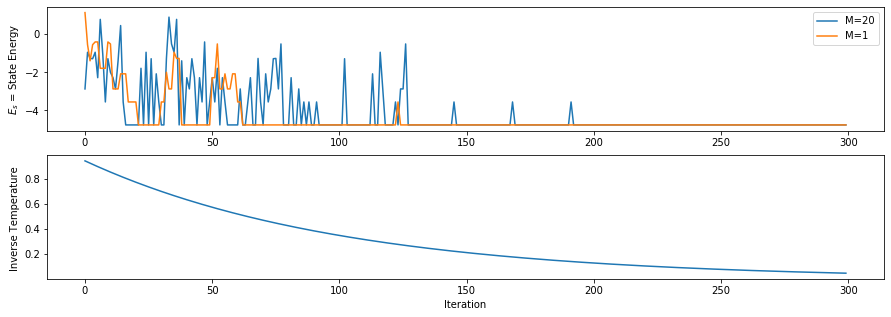

In [1487]:
fig, axs = plt.subplots(2, figsize=(15,5))

axs[0].plot(total_energy_m20, label='M=20')
axs[0].plot(total_energy_m1, label='M=1')
axs[0].set_ylabel('$E_s$ = State Energy ')
axs[0].legend()

axs[1].plot(inv_temp)
axs[1].set_xlabel('Iteration')
axs[1].set_ylabel('Inverse Temperature ')

In [1476]:
energies = np.zeros(states.shape[0])
for i,state in enumerate(states):
    energies[i] = -0.5 * np.sum(w * np.outer(state,state))

In [1477]:
def P_states(beta, energies):
    Z = np.sum(np.exp(-beta*energies)) 
    P_states = np.zeros(states.shape[0])
    for i,state in enumerate(states):
        P_states[i] =   (np.exp(-beta * energies[i])) / (Z)  
    return P_states

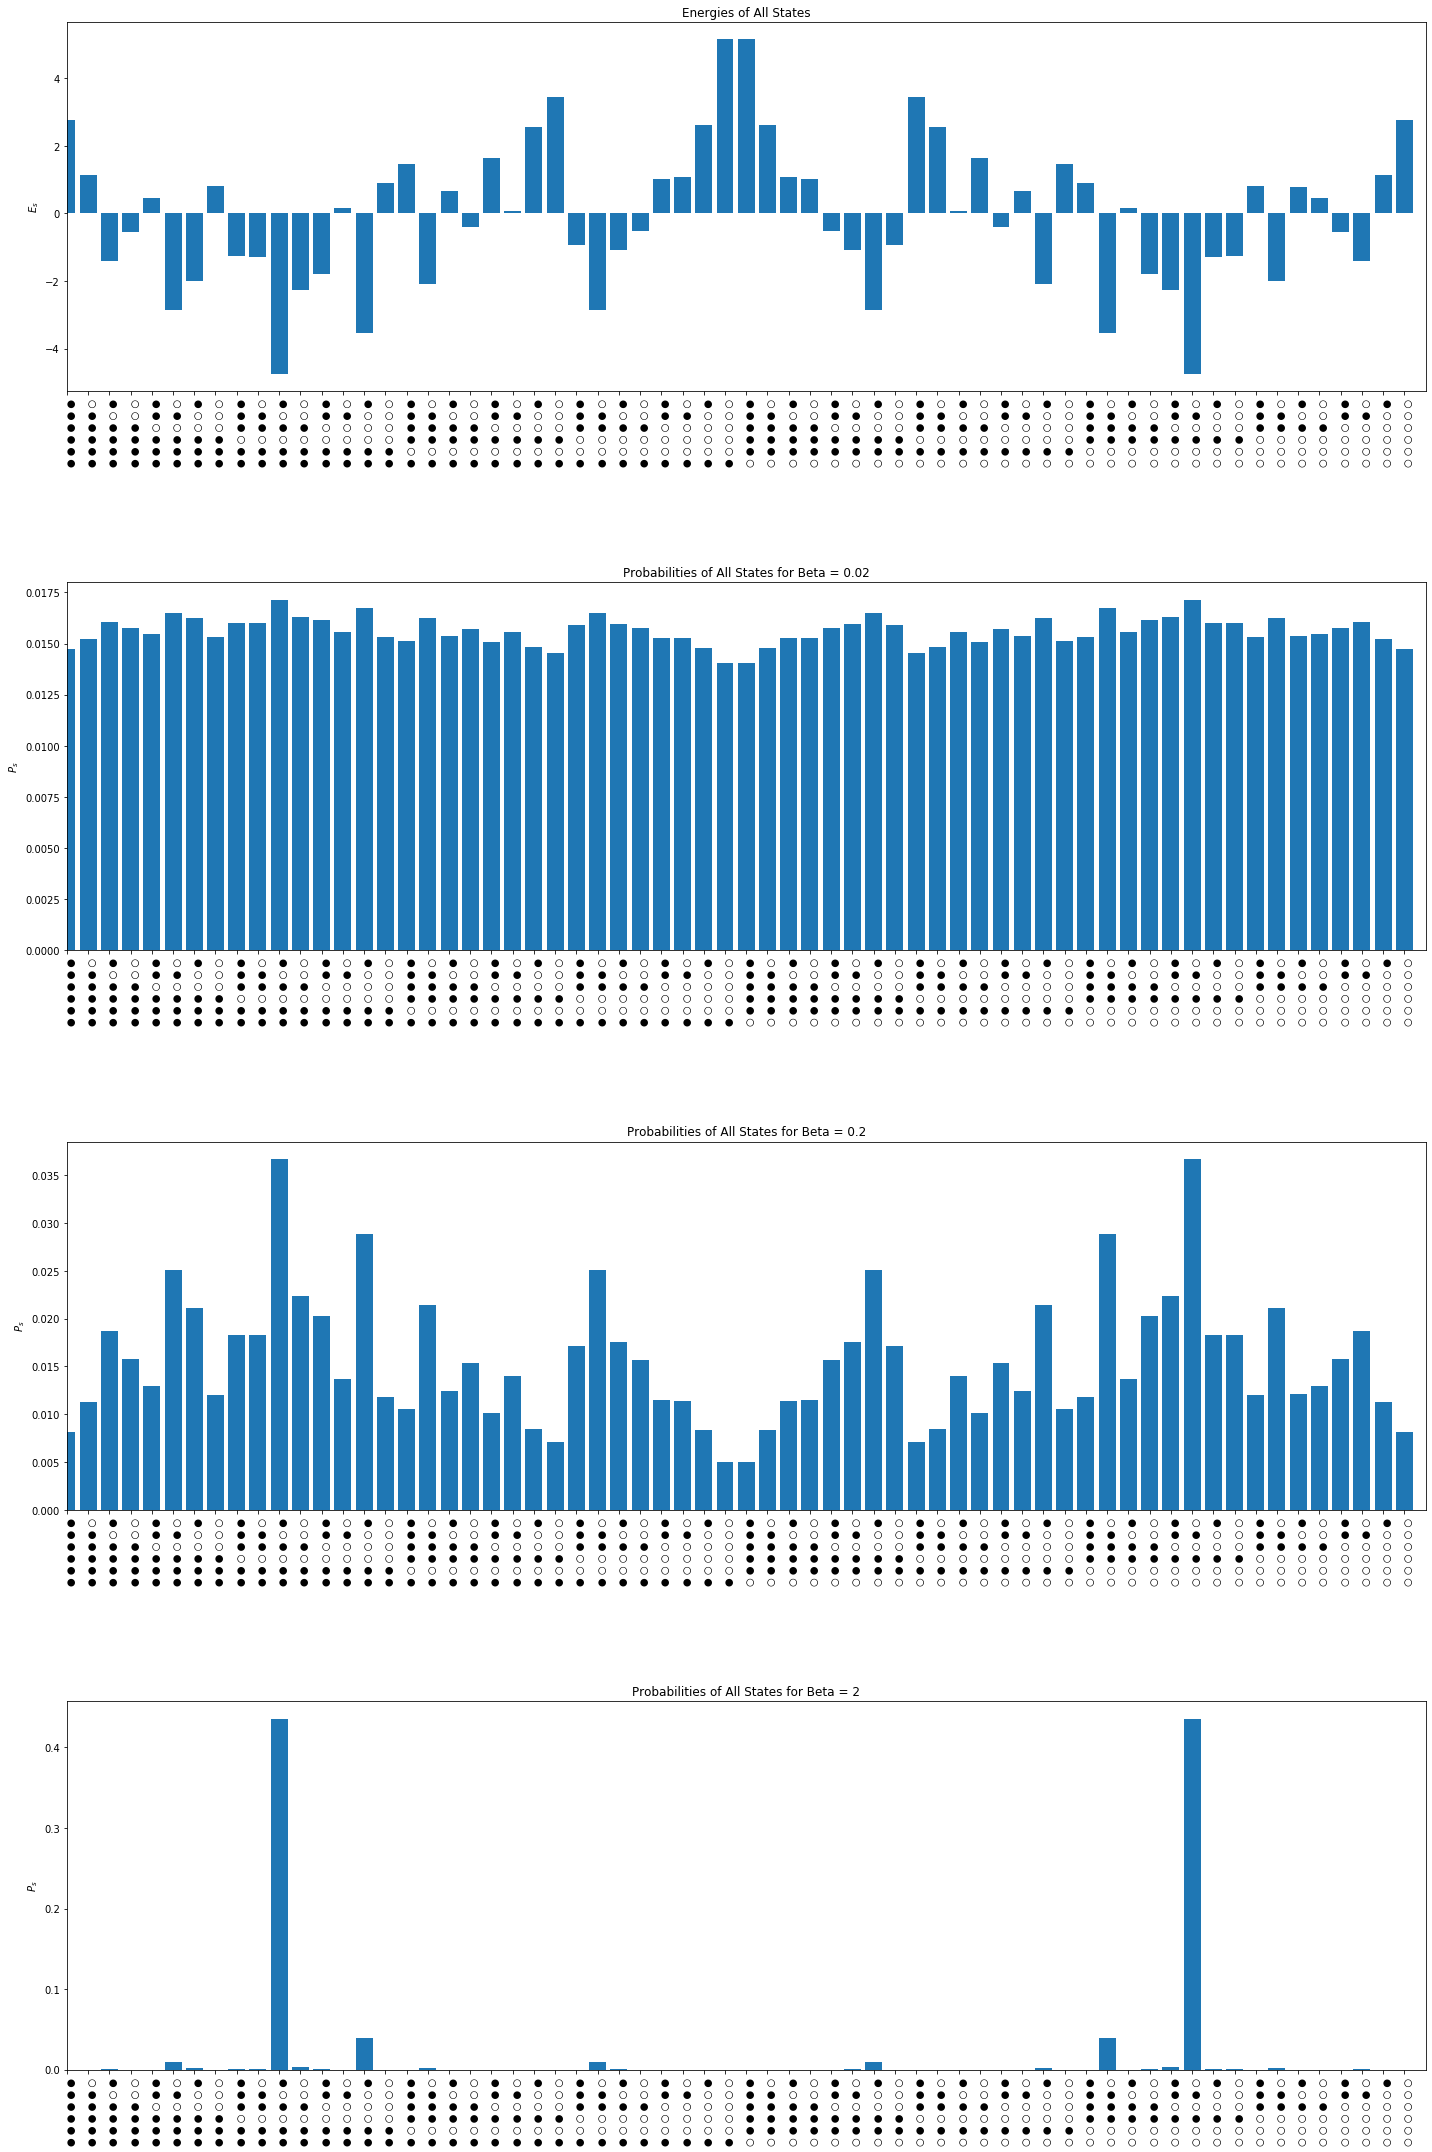

In [1478]:
P_states_002 = P_states(0.02, energies)
P_states_02 = P_states(0.2, energies)
P_states_2 = P_states(2, energies)


fig, axs = plt.subplots(4, 1, figsize=(20, 30))

axs[0].bar(np.arange(64),energies)
axs[0].set_ylabel('$E_s$')
axs[0].set_title('Energies of All States')

axs[1].bar(np.arange(64),P_states_002)
_=axs[1].set_ylabel('$P_s$')
_=axs[1].set_title('Probabilities of All States for Beta = {}'.format(0.02))

axs[2].bar(np.arange(64),P_states_02)
_=axs[2].set_ylabel('$P_s$')
_=axs[2].set_title('Probabilities of All States for Beta = {}'.format(0.2))

axs[3].bar(np.arange(64),P_states_2)
_=axs[3].set_ylabel('$P_s$')
_=axs[3].set_title('Probabilities of All States for Beta = {}'.format(2))


for axis in axs:
    axis.set_xlim([0,64])
    axis.set_xticks(np.arange(64))
    axis.set_xticklabels(labels, rotation='vertical', ha='left');
    
fig.tight_layout(h_pad=10)

## Mean Field Annealing

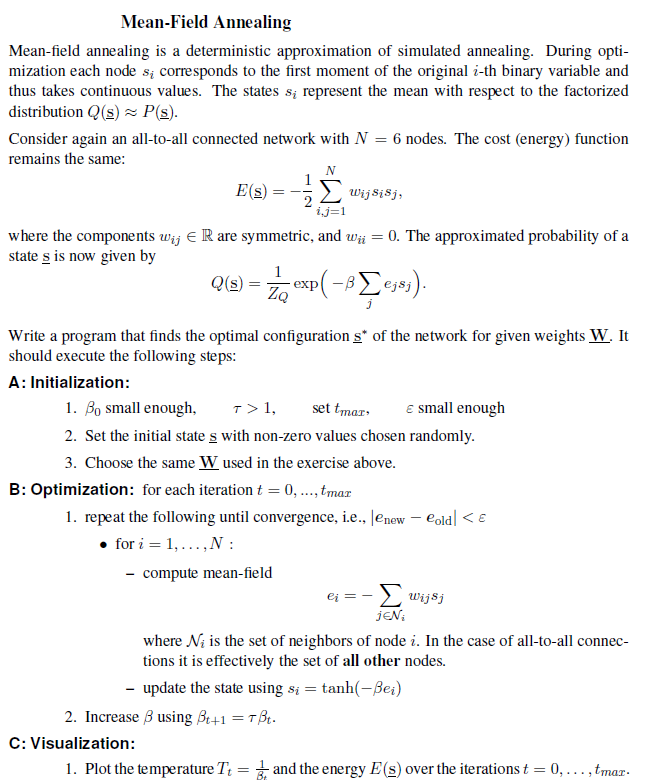

In [2038]:
# Initialization
s = np.random.rand(6)
beta=1.01
tau=1.01
epsilon = 1e-5
w = random_weight(6)

#Initializing e using random initial s
for i in range(6):
        N = np.copy(s)
        N[i] = 0
        e[i] = -1*np.dot(w[i,:], N)
BB=[]
energy = []
history=[list(e)]
norm = [np.abs(np.linalg.norm(s-e))]

In [2039]:
for j in range(150):

    for i in range(6):
        N = np.copy(s)
        N[i] = 0
        e[i] = -1*np.dot(w[i,:], N)
        s[i] = np.tanh(-beta*e[i])
        
    
    beta = beta*tau
    BB.append(beta)
    e_new = np.copy(e)

    #BB.append(beta)
    history.append(e_new)
    norm.append(np.linalg.norm(history[-1]-history[-2]))
    energy.append(-0.5* np.sum(w * np.outer(s,s)))
    #print(norm)
    if np.abs((norm[-1] - norm[-2])) < epsilon:
        break

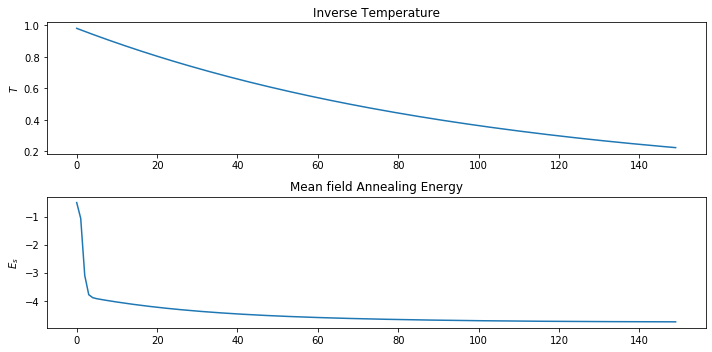

In [2040]:
fig, axs = plt.subplots(2, 1, figsize=(10,5))

axs[0].plot(1/np.array(BB))
axs[0].set_ylabel('$T$')
axs[0].set_title('Inverse Temperature')

axs[1].plot(energy)
axs[1].set_ylabel('$E_s$')
axs[1].set_title('Mean field Annealing Energy')

fig.tight_layout(h_pad=1)


In [2042]:
s

array([ 1.        ,  0.99999985, -0.99999934,  0.99062992, -0.99999962,
        0.99996855])